# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [55]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,MPG checker
0,18.0,8,307,130,3504,12.0,C-1689780,Control,Less than or equal to 20
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,Less than or equal to 20
2,18.0,8,318,150,3436,11.0,P-1689802,Control,Less than or equal to 20
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,Less than or equal to 20
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment,Less than or equal to 20
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,Greater than 20
394,44.0,4,97,52,2130,24.6,V-1694114,Control,Greater than 20
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Greater than 20
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment,Greater than 20


<font size = "5">

Compute frequencies by status

In [56]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,247
Treatment,151


col_0,Frequency
status,
Control,0.620603
Treatment,0.379397


<font size = "5">

Query with string conditions

In [54]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [46]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,23.656552,5.558621,194.965517,2999.124138,15.622069
std,8.487383,1.735559,103.989477,862.268865,2.806626
min,9.000000,4.000000,68.000000,1760.000000,9.500000
25%,17.000000,4.000000,98.000000,2200.000000,13.900000
50%,22.000000,4.000000,144.000000,2910.000000,15.000000
75%,29.900000,8.000000,302.000000,3672.000000,17.300000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,23.433202,5.395257,192.545455,2953.976285,15.537154
std,7.420168,1.681451,104.624019,839.151120,2.734372
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,2245.000000,13.800000
50%,23.000000,4.000000,151.000000,2735.000000,15.500000
75%,28.800000,6.000000,258.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [10]:
def func(mpg):
    if mpg > 20:
        return("Greater than 20")
    else:
        return("Less than or equal to 20")

carfeatures["MPG checker"] = carfeatures["mpg"].apply(func)
carfeatures




,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,MPG checker
0,18.0,8,307,130,3504,12.0,C-1689780,Control,Less than or equal to 20
1,15.0,8,350,165,3693,11.5,B-1689791,Control,Less than or equal to 20
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment,Less than or equal to 20
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,Less than or equal to 20
4,17.0,8,302,140,3449,10.5,F-1689824,Control,Less than or equal to 20
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment,Greater than 20
394,44.0,4,97,52,2130,24.6,V-1694114,Control,Greater than 20
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Greater than 20
396,28.0,4,120,79,2625,18.6,F-1694136,Control,Greater than 20


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [17]:
ybar = carfeatures["displacement"].mean()
stdv_sample = carfeatures["displacement"].std()
subset_data = carfeatures.query("abs(displacement - @ybar) <= @stdv_sample")
subset_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,MPG checker
14,24.0,4,113,95,2372,15.0,T-1689934,Control,Greater than 20
15,22.0,6,198,95,2833,15.5,P-1689945,Treatment,Greater than 20
16,18.0,6,199,97,2774,15.5,A-1689956,Treatment,Less than or equal to 20
17,21.0,6,200,85,2587,16.0,F-1689967,Control,Greater than 20
18,27.0,4,97,88,2130,14.5,D-1689978,Control,Greater than 20
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment,Greater than 20
394,44.0,4,97,52,2130,24.6,V-1694114,Control,Greater than 20
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Greater than 20
396,28.0,4,120,79,2625,18.6,F-1694136,Control,Greater than 20


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [36]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
display(carsorted.iloc[0,:])

mpg                        46.6
cylinders                     4
displacement                 86
horsepower                   65
weight                     2110
acceleration               17.9
vehicle_id            M-1693322
status                  Control
MPG checker     Greater than 20
Name: 322, dtype: object

<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [38]:
carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,MPG checker
0,18.0,8,307,130,3504,12.0,C-1689780,Control,Less than or equal to 20
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,Less than or equal to 20
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment,Less than or equal to 20
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,Less than or equal to 20
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment,Less than or equal to 20
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment,Greater than 20
394,44.0,4,97,52,2130,24.6,V-1694114,Control,Greater than 20
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Greater than 20
396,28.0,4,120,79,2625,18.6,F-1694136,Control,Greater than 20


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,MPG checker
0,18.0,8,307,130,3504,12.0,C-1689780,Control,Less than or equal to 20
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,Less than or equal to 20
2,18.0,8,318,150,3436,11.0,P-1689802,Control,Less than or equal to 20
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,Less than or equal to 20
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment,Less than or equal to 20
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,Greater than 20
394,44.0,4,97,52,2130,24.6,V-1694114,Control,Greater than 20
395,32.0,4,135,84,2295,11.6,D-1694125,Control,Greater than 20
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment,Greater than 20


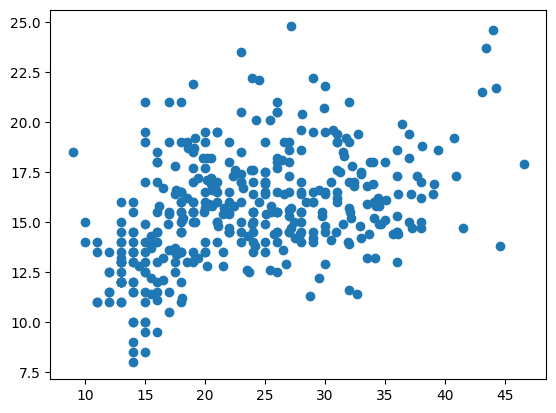

In [60]:
display(carfeatures)

# For this example we will plot acceleration vs. mpg
plt.scatter(x = carfeatures["mpg"], y = carfeatures["acceleration"])
plt.show()

# Basically this question will probably just ask us to calculate a bunch of stats and then the error of a random line

def line_mxb(x, b0, b1):
    return b0 + b1*x

def error_line(line_out, y):
    return line_out - y




<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

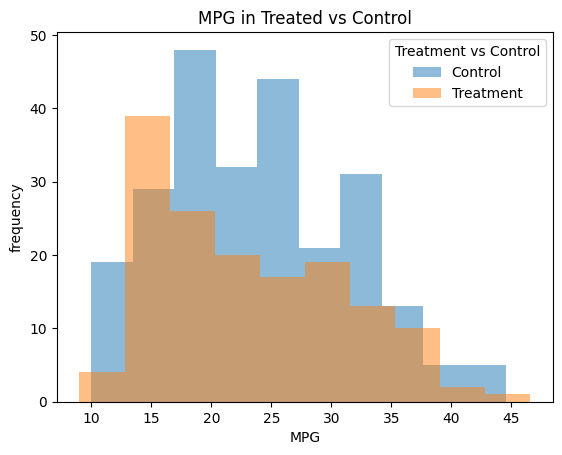

In [57]:
list_dataset = [data_control, data_treated]
last_unique_dataset = pd.unique(carfeatures["status"])
for value in last_unique_dataset:
    df = carfeatures.query("status == @value")
    plt.hist(x = df["mpg"], alpha = .5)
plt.xlabel("MPG")
plt.ylabel("frequency")
plt.legend(labels = last_unique_dataset, title = "Treatment vs Control")
plt.title("MPG in Treated vs Control")
plt.show()



In [ ]:
# d
def fn_rss(y, x, b0, b1):
    e2 = (y - b0 - (b1 * x)) ** 2
    return np.sum(e2)

rss_1 = fn_rss(fifa23["Overall"], fifa23["Age"], 50, -6)
rss_2 = fn_rss(fifa23["Overall"], fifa23["Age"], 50, .6)
rss_3 = fn_rss(fifa23["Overall"], fifa23["Age"], 50, 6)
print("Using b0 = 50, b1 = -6 produces rss of " + str(rss_1) + ", using b0 = 50, b1 = .6 produces rss of " + str(rss_2) +
      ", and using b0 = 50, b1 = 6 produces rss of " + str(rss_3) + ". b0 = 50, b1 = .6 produces the lowest rss value.")

#e
list_status = [1, 2]
list_prob = [.5, .5]
n = len(fifa23)

fifa23["status"] = np.random.choice(list_status, size = n, p = list_prob)

data1 = fifa23.query("status == 1")
data2 = fifa23.query("status == 2")

display(data1)
display(data2)
#f
list_datasets = [data1, data2]
list_datasets_names = ["Status = 1", "Status = 2"]

for dataset in list_datasets:
    plt.hist(x = dataset["Potential"], alpha = .5)

plt.legend(labels = list_datasets_names)
plt.title("Distribution of Player Potential based on Status (1 or 2)")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()